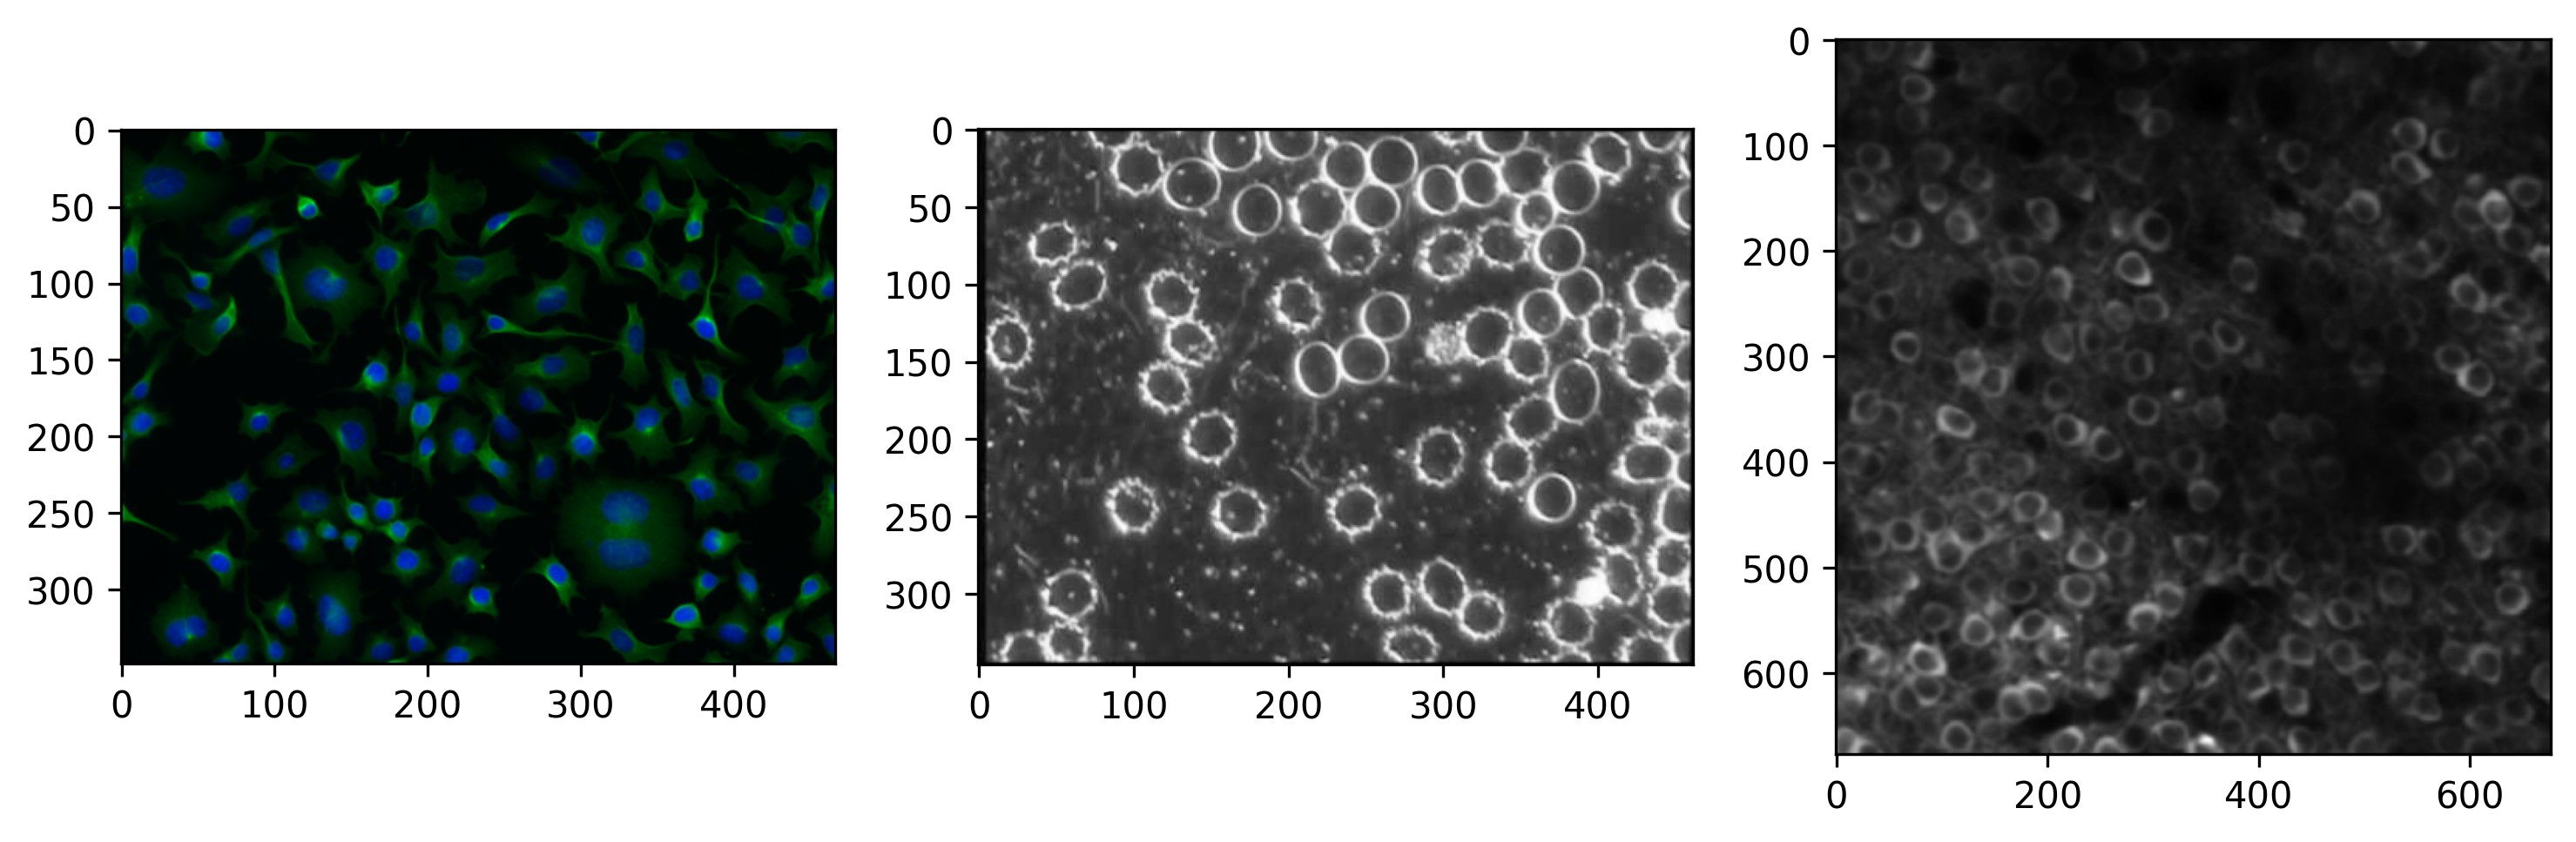

In [1]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io

# I will download images from website
urls = ['http://www.cellpose.org/static/images/img02.png',
        'http://www.cellpose.org/static/images/img03.png',
        'http://www.cellpose.org/static/images/img05.png']
files = []
for url in urls:
    parts = urlparse(url)
    filename = os.path.basename(parts.path)
    if not os.path.exists(filename):
        sys.stderr.write('Downloading: "{}" to {}\n'.format(url, filename))
        utils.download_url_to_file(url, filename)
    files.append(filename)

# REPLACE FILES WITH YOUR IMAGE PATHS
# files = ['img0.tif', 'img1.tif']
    
imgs = [io.imread(f) for f in files]
nimg = len(imgs)

plt.figure(figsize=(12,4))
for k,img in enumerate(imgs):
    plt.subplot(1,3,k+1)
    plt.imshow(img)

In [2]:
# RUN CELLPOSE

from cellpose import models, io

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels = [[2,3], [0,0], [0,0]]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images
masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)

# save results so you can load in gui
io.masks_flows_to_seg(imgs, masks, flows, diams, files, channels)

# save results as png
io.save_to_png(imgs, masks, flows, files)

  0%|                                                                              | 0/3 [00:00<?, ?it/s]

>>>> using CPU
cellpose_residual_on_style_on_concatenation_off
processing 3 image(s)


  0%|                                                                              | 0/3 [00:00<?, ?it/s]

time spent: running network 8.93s; flow+mask computation 0.00


  0%|                                                                              | 0/3 [00:00<?, ?it/s]

time spent: running network 8.48s; flow+mask computation 3.44
estimated cell diameters for 3 image(s) in 21.10 sec


100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:39<00:00, 13.09s/it]


time spent: running network 35.68s; flow+mask computation 3.59
estimated masks for 3 image(s) in 39.31 sec
>>>> TOTAL TIME 60.40 sec
(349, 467)
(346, 462)
(677, 677)


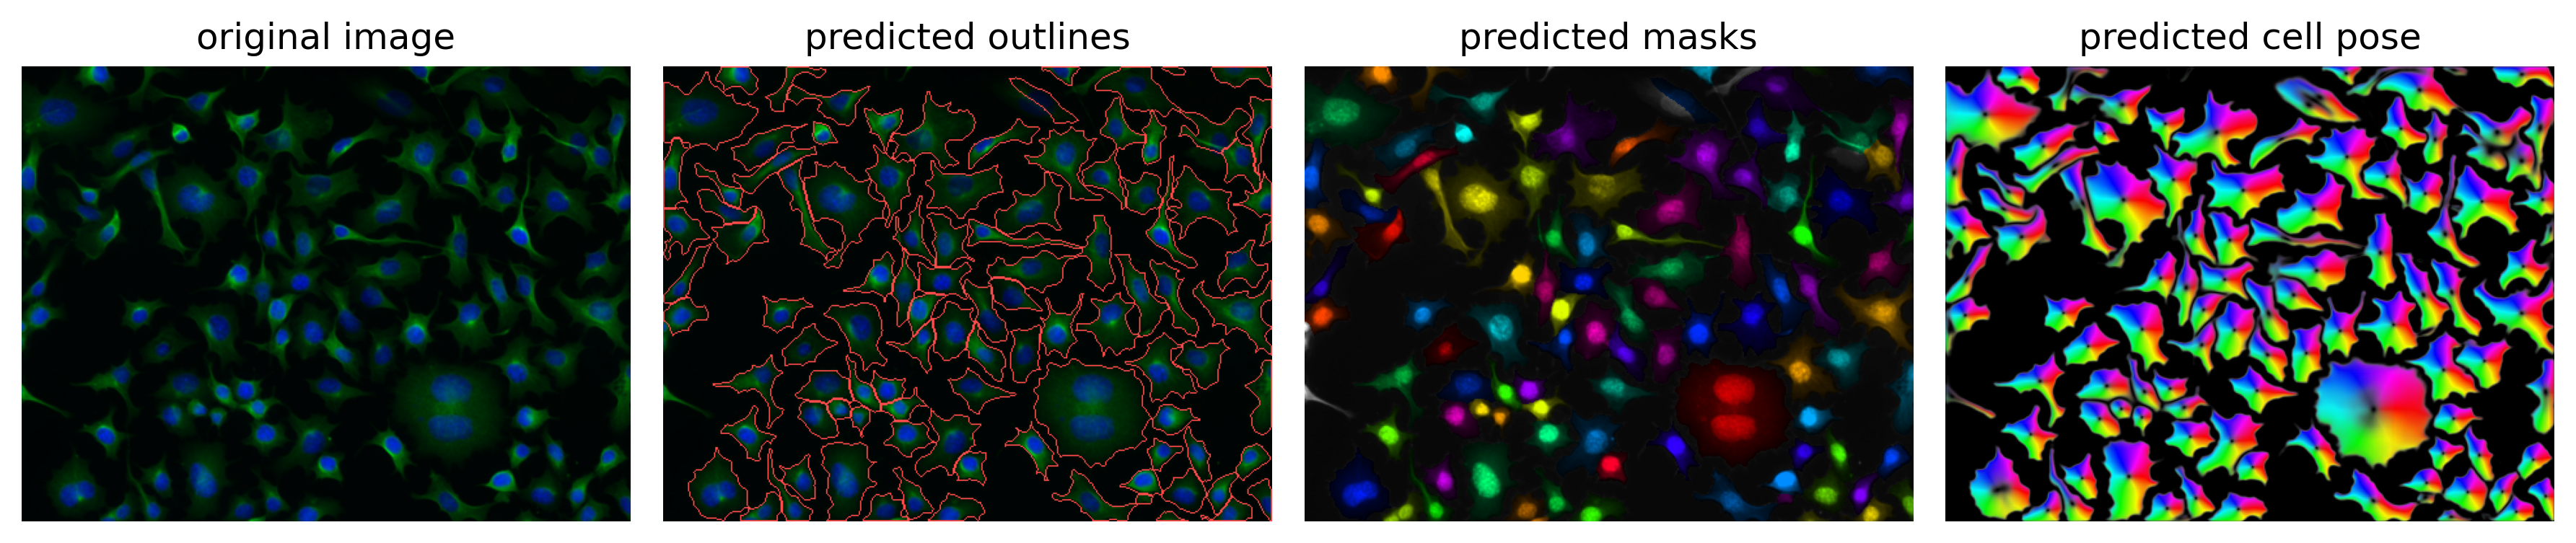

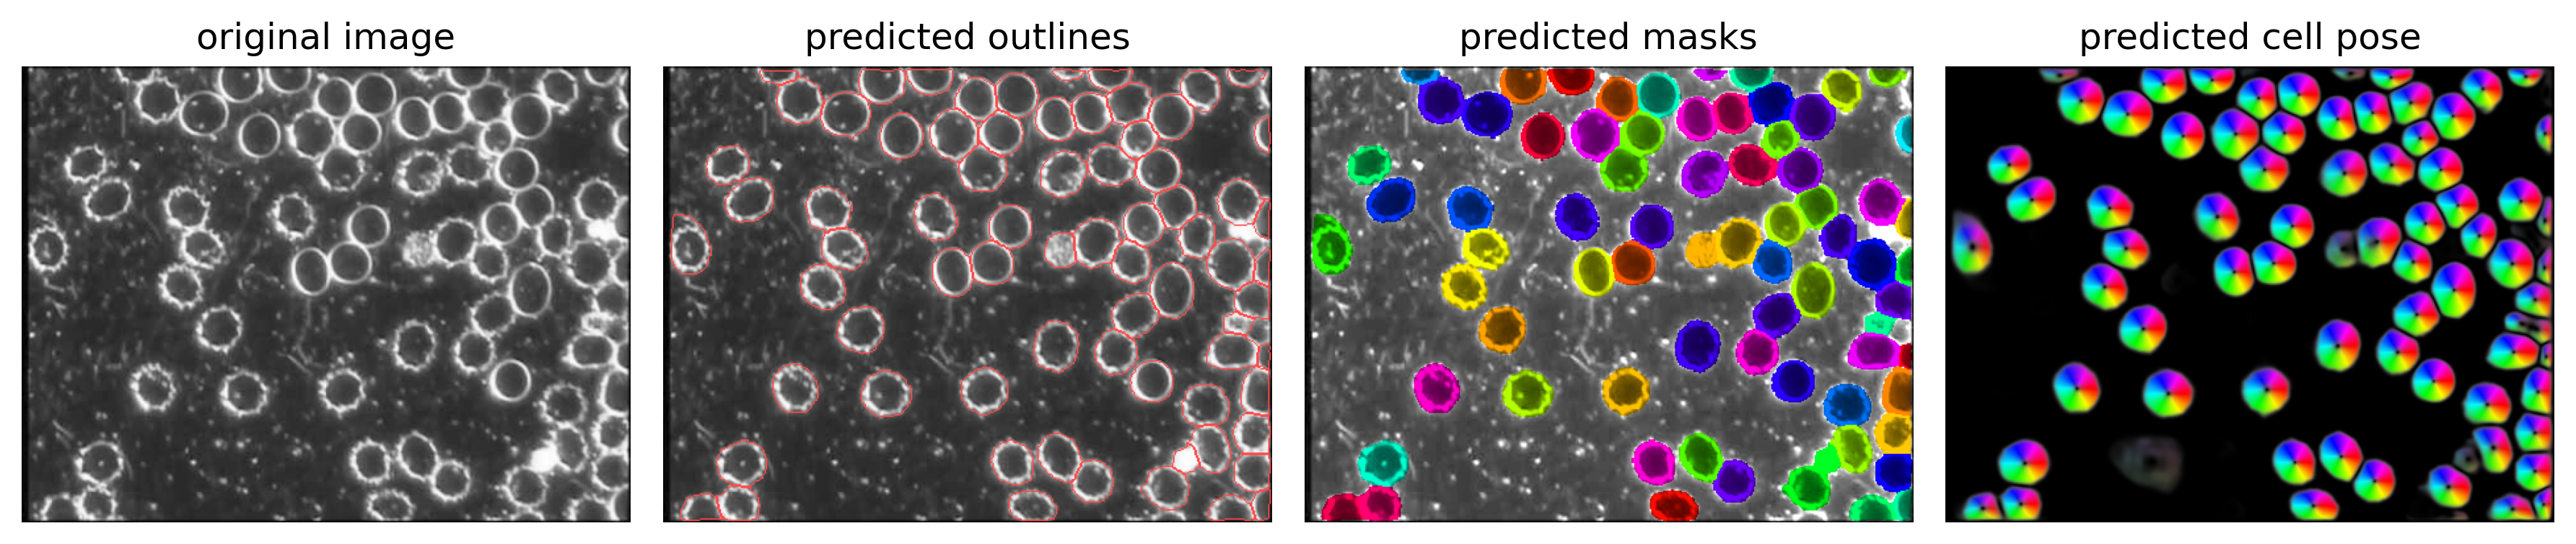

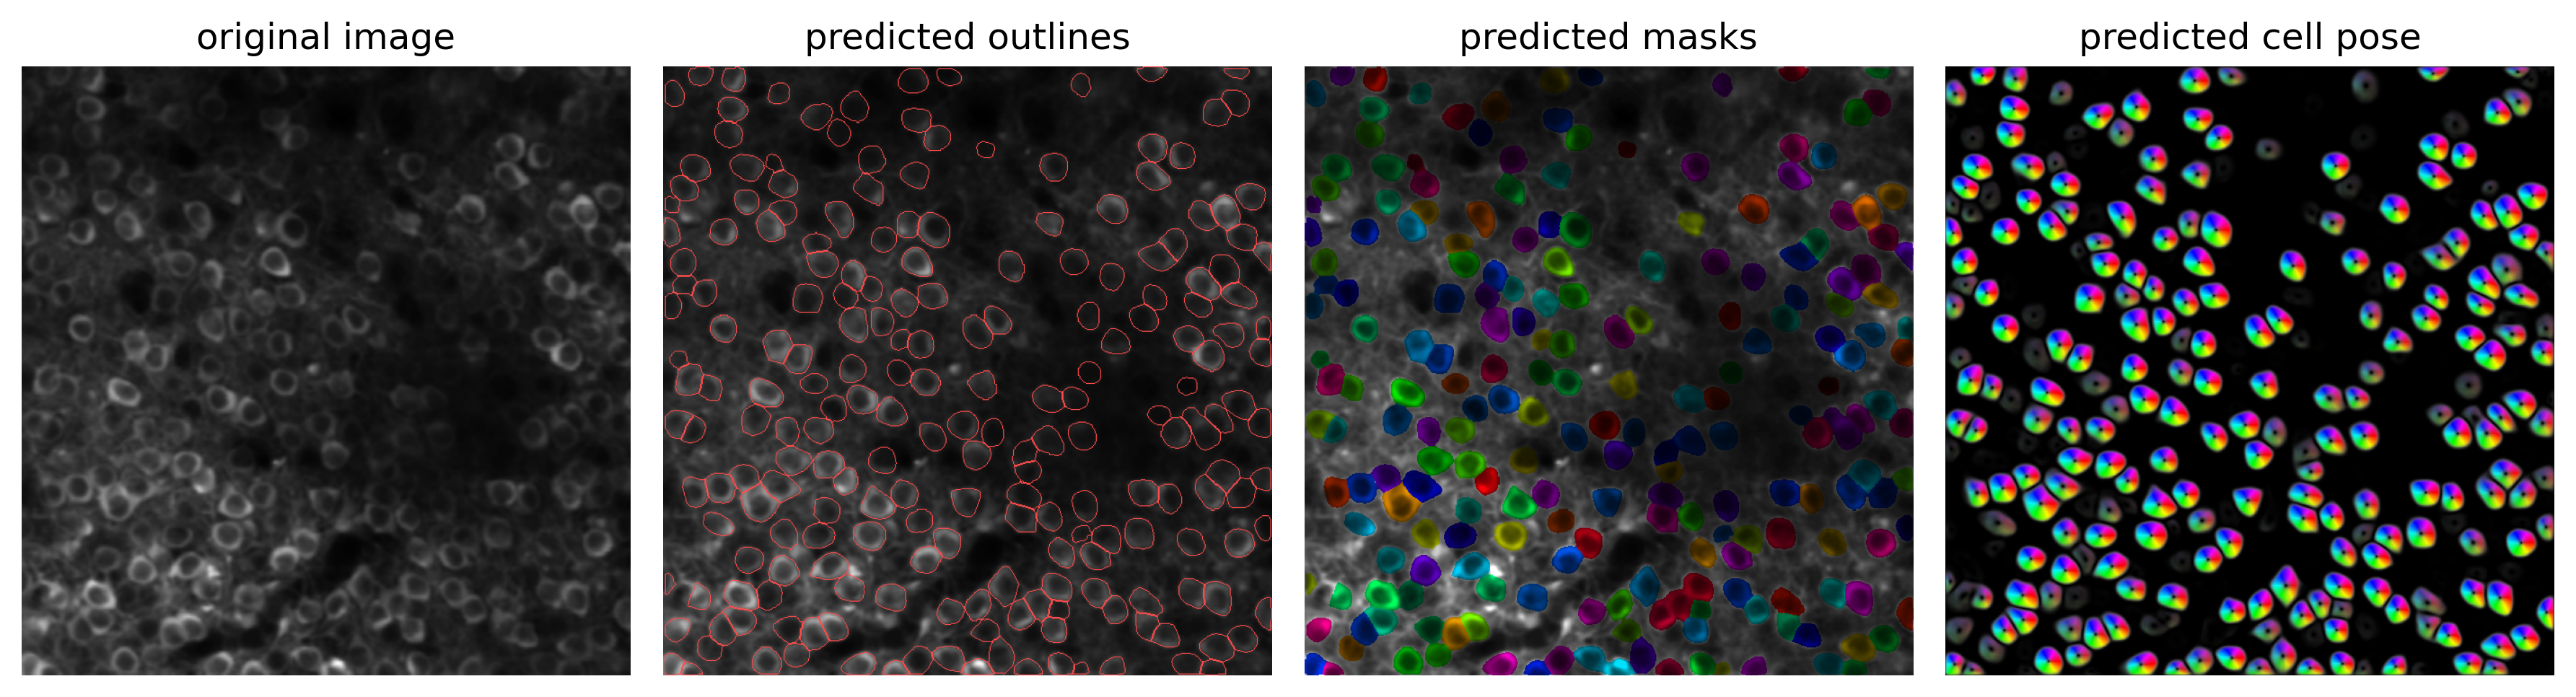

In [3]:
# DISPLAY RESULTS
from cellpose import plot

nimg = len(imgs)
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=channels[idx])
    plt.tight_layout()
    plt.show()

In [3]:
from cellpose import models, io
model = models.Cellpose(gpu=False, model_type='cyto')
channels = [2,3]
masks, flows, styles, diams = model.eval(imgs[0], diameter=None, channels=channels)
print(len(np.unique(masks)))

>>>> using CPU
cellpose_residual_on_style_on_concatenation_off
processing 1 image(s)
time spent: running network 1.41s; flow+mask computation 0.00
time spent: running network 1.20s; flow+mask computation 0.73
estimated cell diameters for 1 image(s) in 3.44 sec
time spent: running network 7.61s; flow+mask computation 0.81
estimated masks for 1 image(s) in 8.43 sec
>>>> TOTAL TIME 11.87 sec


In [5]:
from cellpose import models, io
model = models.Cellpose(gpu=False, model_type='cyto')
channels = [2,3]
masks, flows, styles, diams = model.eval(imgs[0], diameter=None, channels=channels)
print(len(np.unique(masks)))

>>>> using CPU
cellpose_residual_on_style_on_concatenation_off
processing 1 image(s)
time spent: running network 1.27s; flow+mask computation 0.00
time spent: running network 1.25s; flow+mask computation 0.74
estimated cell diameters for 1 image(s) in 3.36 sec
time spent: running network 7.96s; flow+mask computation 0.81
estimated masks for 1 image(s) in 8.77 sec
>>>> TOTAL TIME 12.13 sec
102
